In [2]:
import pickle as pkl
from scipy.stats import spearmanr, pearsonr
from scipy.stats.stats import kendalltau

import numpy as np

In [3]:
from scipy.stats import norm
def norm_pdf_list(length):
    return np.array(range(length)) / length * 100
    l = []
    for i in range(length):
        l.append(norm.ppf(i/length))
    return l

In [4]:
from matplotlib import pyplot as plt

def rescale(pr, gt=None):
    if gt is None:
        print(np.mean(pr), np.std(pr))
        pr = (pr - np.mean(pr)) / np.std(pr)
    else:
        print(np.mean(pr), np.std(pr), np.std(gt), np.mean(gt))
        pr = ((pr - np.mean(pr)) / np.std(pr)) * np.std(gt) + np.mean(gt)
    return pr

## Divergence Map based on Normalized Rank

Normalized aesthetic scores:

$$\hat{Q}_\mathrm{pred,A} = \frac{Q_\mathrm{pred,A}) - \overline{Q_\mathrm{pred,A})}}{\sigma(Q_\mathrm{pred,A}))}$$

Normalized technical scores:

$$    \hat{Q}_\mathrm{pred,T} = \frac{Q_\mathrm{pred,T}) - \overline{Q_\mathrm{pred,T})}}{\sigma(Q_\mathrm{pred,T}))} $$

Rank-rescaled scores:

$$    {\mathrm{R}}_\mathrm{pred, A} = \mathrm{rank}(\hat{Q}_\mathrm{pred,A}) $$
$$    {\mathrm{R}}_\mathrm{pred, T} = \mathrm{rank}(\hat{Q}_\mathrm{pred,T}) $$

The ${\mathrm{R}}_\mathrm{pred, A}$ and ${\mathrm{R}}_\mathrm{pred, T}$ are the axes (in percentage) of the figure generated below and the normalized score in Paper Figure 7.

SpearmanrResult(correlation=0.8342785563237682, pvalue=0.0)
(0.8546608251866762, 0.0)
KendalltauResult(correlation=0.6483059496166795, pvalue=0.0)
(((-0.68594533, 1.2622645, 1402, 64.3428571428571), 22.921914357682617), 93.36691855583543) (((1.5832812, -0.9271463, 2855, 52.0909090909091), 98.0688497061293), 15.449202350965574)


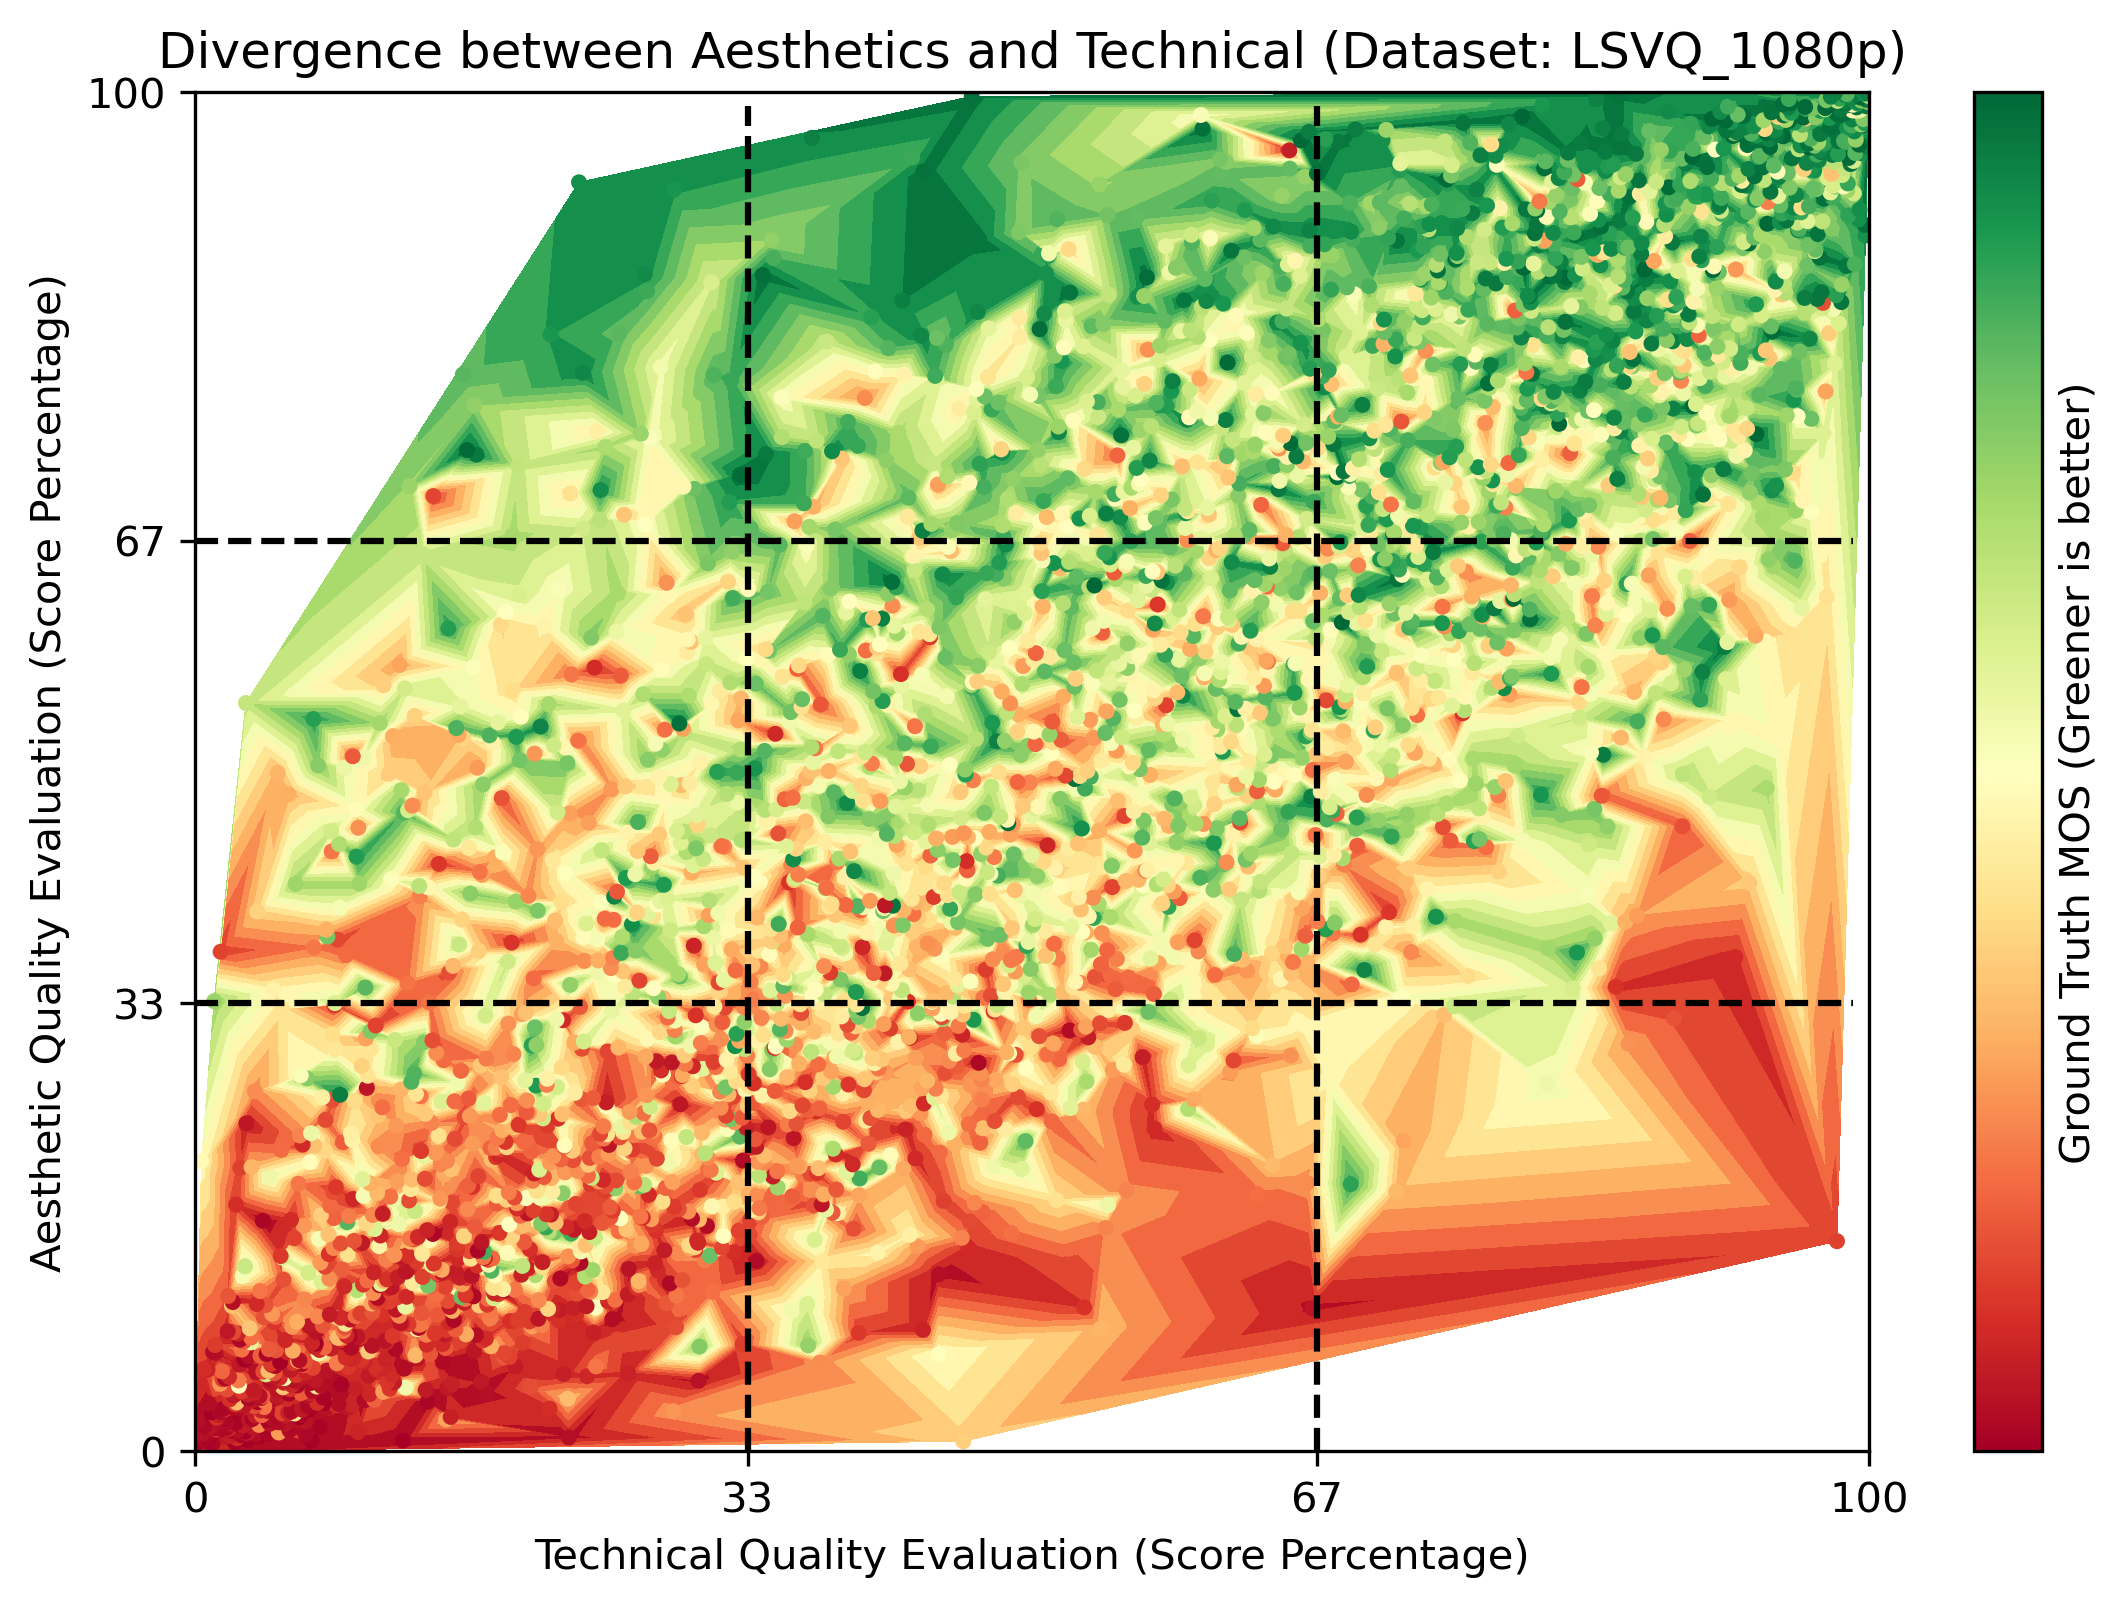

In [5]:
with open("examplar_data_labels/LSVQ/labels_1080p.txt") as f:
    gt_labels = [float(ele.split(",")[-1]) for ele in f.readlines()]

db = "l1080p"
with open(f"dover_predictions/val-{db}.pkl","rb") as f:
    pr_labels = pkl.load(f)
    
    
print(spearmanr(pr_labels["fragments"], pr_labels["resize"]))
print(pearsonr(pr_labels["fragments"], pr_labels["resize"]))
print(kendalltau(pr_labels["fragments"], pr_labels["resize"]))


    

tup = list(zip(pr_labels["fragments"], pr_labels["resize"], range(len(gt_labels)), gt_labels))
tup = list(zip(sorted(tup, key=lambda x: x[0]), norm_pdf_list(len(tup))))
tup = list(zip(sorted(tup, key=lambda x: x[0][1]), norm_pdf_list(len(tup))))
overall_rank = sorted(zip(0.6 * pr_labels["fragments"] + 0.4 * pr_labels["resize"], range(len(gt_labels))))

fig = plt.figure(figsize=(9,6),dpi=300)
    
plt.plot([0,99], [33,33], c="black", linestyle="dashed")
plt.plot([33,33], [0,99], c="black", linestyle="dashed")
plt.plot([0,99], [67,67], c="black", linestyle="dashed")
plt.plot([67,67], [0,99], c="black", linestyle="dashed")
plt.title("Divergence between Aesthetics and Technical (Dataset: LSVQ_1080p)",fontsize=12)

x, y, z, pos = [ele[-2][-1] for ele in tup], [ele[-1] for ele in tup], [ele[0][0][-1] for ele in tup], [ele[0][0][-2] for ele in tup]
u = plt.tricontourf(x, y, np.argsort(z), 20, cmap="RdYlGn")

print(tup[np.argsort(np.array(x) - np.array(y))[0]], tup[np.argmax(np.array(x) - np.array(y))])

plt.scatter(x,y, c=np.argsort(z), s=8, cmap="RdYlGn")
plt.colorbar(label="Ground Truth MOS (Greener is better)",ticks=[])


plt.ylabel("Aesthetic Quality Evaluation (Score Percentage)")
plt.xlabel("Technical Quality Evaluation (Score Percentage)")

plt.xticks([0, 33,67, 100],[0, 33,67, 100])
plt.yticks([0, 33,67, 100],[0, 33,67, 100])


plt.savefig(f"dover_predictions/{db}.png")

In [11]:
zi = np.arange(len(gt_labels))[np.argsort(gt_labels).argsort()]

In [12]:
xy = np.stack(sorted(zip(x,y,z,pos),key=lambda x:x[0]),0) 
yx = np.stack(sorted(zip(x,y,z,pos),key=lambda y:y[1]),0) 

In [13]:
## gmad when technical is similar and aesthetic is different
ymad = (yx[1:] - yx[:-1]).argsort(0)

In [14]:
## gmad when aesthetic is similar and technical is different
xmad = (xy[1:] - xy[:-1]).argsort(0)

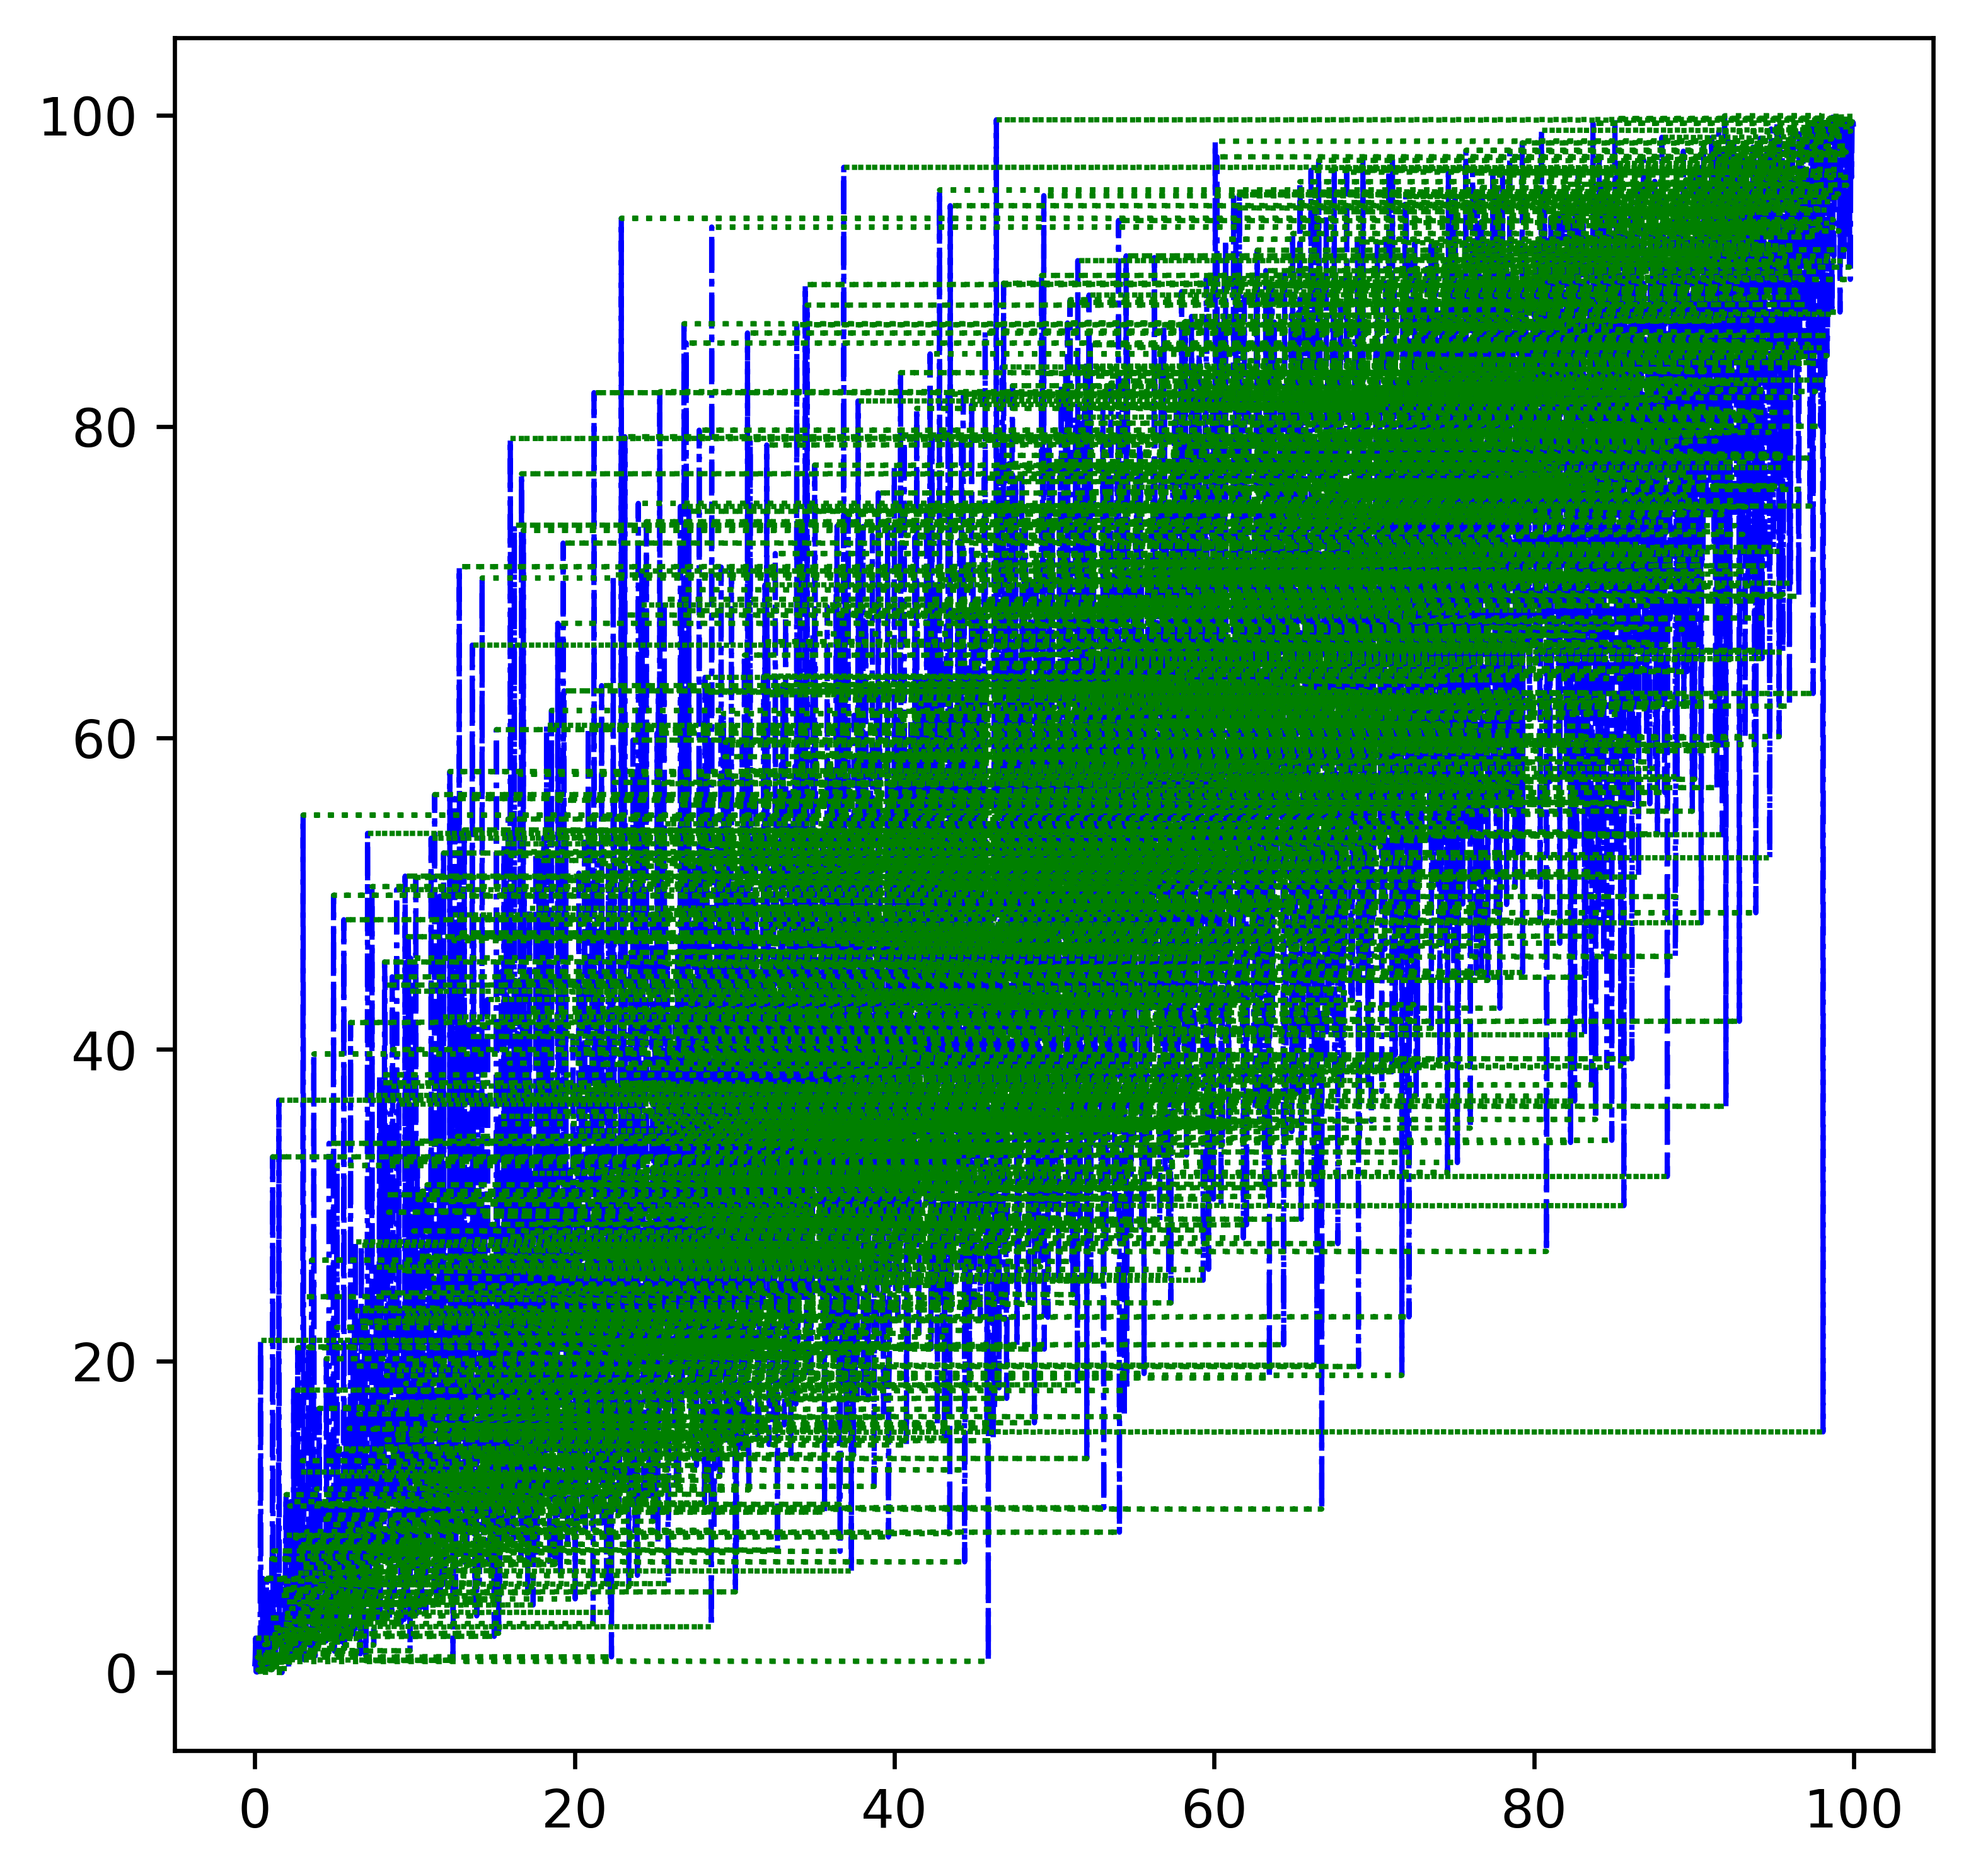

In [20]:
plt.figure(dpi=600,figsize=(6,6))
plt.plot(xy[:,0],xy[:,1], linewidth=1, linestyle="dashdot", c="b")
plt.plot(yx[:,0],yx[:,1], linewidth=1, linestyle="dotted", c="g")